In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
dataset.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [4]:
dataset = dataset.drop(columns = ["RowNumber","CustomerId","Surname"],axis = 1)

In [5]:
dataset.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<Axes: xlabel='Geography', ylabel='count'>

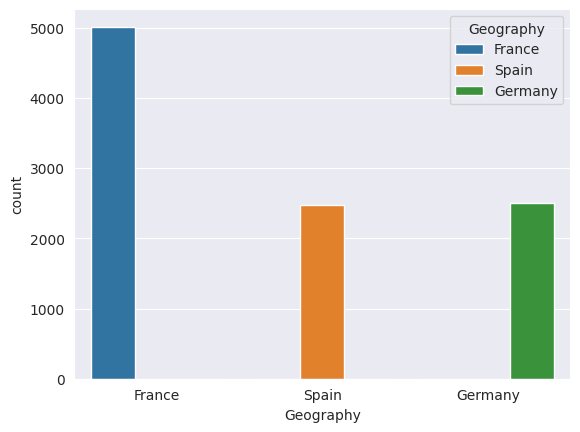

In [6]:
sns.set_style("darkgrid")
sns.countplot(data = dataset, x = "Geography",hue = "Geography")

<Axes: xlabel='Gender', ylabel='count'>

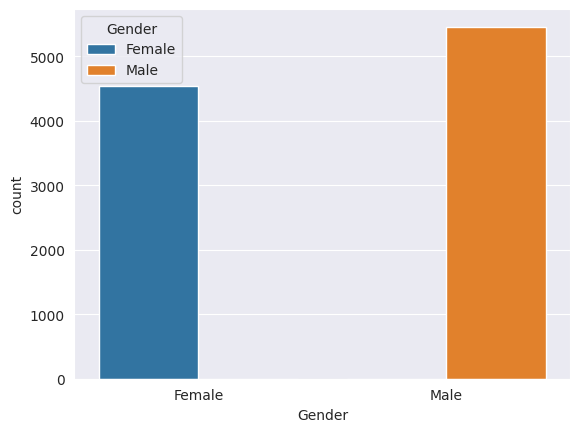

In [7]:
sns.set_style("darkgrid")
sns.countplot(data = dataset, x = "Gender",hue = "Gender")

In [8]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

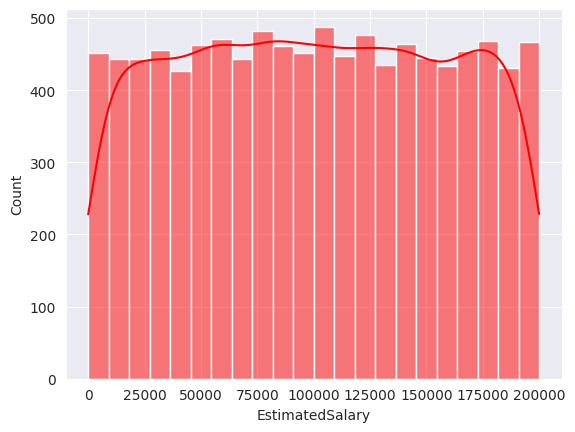

In [9]:
sns.histplot(data = dataset,x = "EstimatedSalary",color = "red",kde = True)

In [10]:
encoder = LabelEncoder()

dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0


In [11]:
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])
dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0


In [12]:
scaler = StandardScaler()

estimated_salary = dataset["EstimatedSalary"].values.reshape(-1, 1)
scaled_salary = scaler.fit_transform(estimated_salary)
dataset["EstimatedSalary"] = scaled_salary
dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,0.021886,1
1,608,2,0,41,1,83807.86,1,0,1,0.216534,0
2,502,0,0,42,8,159660.80,3,1,0,0.240687,1
3,699,0,0,39,1,0.00,2,0,0,-0.108918,0


In [13]:
balance = dataset["Balance"].values.reshape(-1, 1)
scaled_balance = scaler.fit_transform(balance)
dataset["Balance"] = scaled_balance
dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = dataset.corr(),annot = True, cmap = "Reds")

<Axes: >

In [ ]:
dataset = dataset.drop(columns = ["HasCrCard"], axis = 1)

In [ ]:
dataset.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,1,0.216534,0
2,502,0,0,42,8,1.333053,3,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,-0.108918,0


In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset[["Exited"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 9), (2000, 9), (8000, 1), (2000, 1))

Using Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)*100, dtc.score(x_test, y_test)*100

(85.3375, 85.35000000000001)

0.495697074010327


<Axes: >

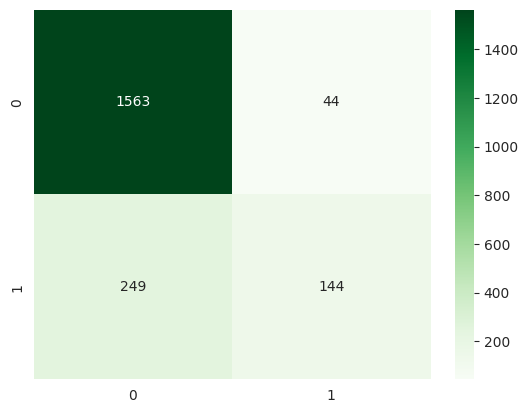

In [61]:
cm = confusion_matrix(y_test,dtc.predict(x_test))
print(f1_score(y_test,dtc.predict(x_test)))
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Greens")

**USING SVM**

In [21]:
svc = SVC(kernel = "rbf")
svc.fit(x_train,y_train)
svc.score(x_train, y_train)*100, svc.score(x_test, y_test)*100

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(79.45, 80.35)

0.0


<Axes: >

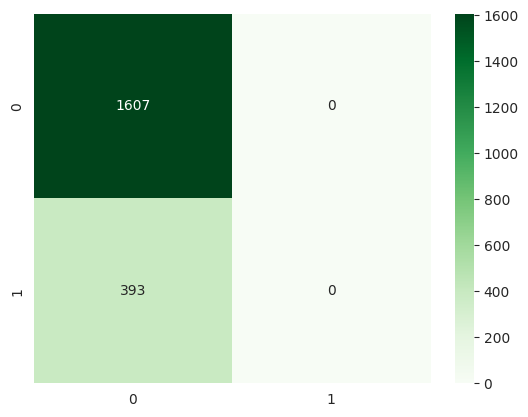

In [63]:
cm = confusion_matrix(y_test,svc.predict(x_test))
print(f1_score(y_test,svc.predict(x_test)))
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Greens")

**Using KNN**

In [38]:
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(81.72500000000001, 81.2)

0.265625


<Axes: >

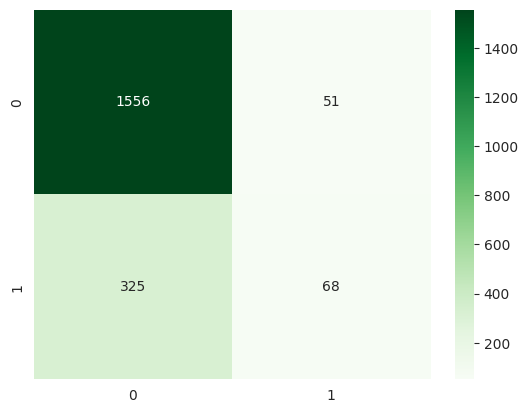

In [67]:
cm = confusion_matrix(y_test,knn.predict(x_test))
print(f1_score(y_test,knn.predict(x_test)))
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Greens")

**Using Gaussian NB**

In [39]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(82.9375, 82.95)

0.3553875236294896


<Axes: >

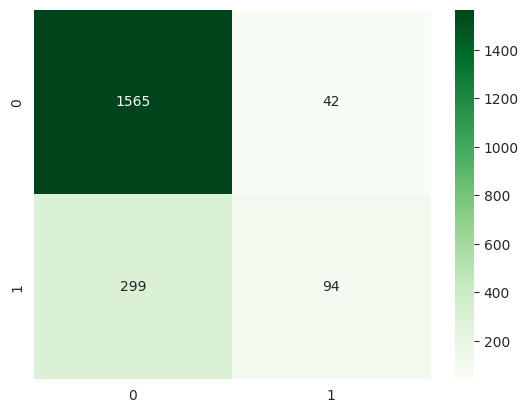

In [68]:
cm = confusion_matrix(y_test,gnb.predict(x_test))
print(f1_score(y_test,gnb.predict(x_test)))
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Greens")

**Using Random-Forest**

In [55]:
rfc = RandomForestClassifier(n_estimators = 12)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)*100, rfc.score(x_test, y_test)*100

/tmp/ipykernel_33/656615863.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


(98.7625, 85.6)

0.535483870967742


<Axes: >

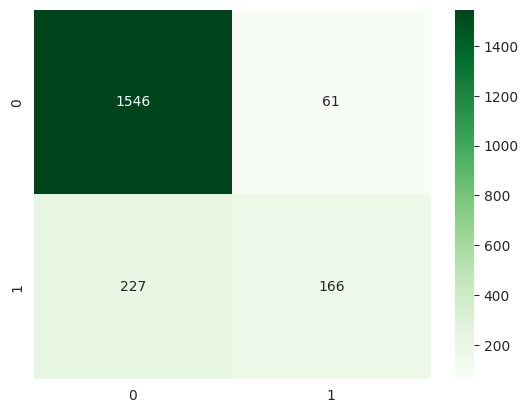

In [69]:
cm = confusion_matrix(y_test,rfc.predict(x_test))
print(f1_score(y_test,rfc.predict(x_test)))
sns.heatmap(cm,annot = True,fmt= "d",cmap = "Greens")